# Data Preprocessing on Titanic Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## handling duplication

In [3]:
data = df.drop(["who","adult_male",'survived'], axis = 1)
data.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alive,alone
0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,no,False
1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,yes,False
2,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,yes,True
3,1,female,35.0,1,0,53.1000,S,First,C,Southampton,yes,False
4,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,no,True


## Non Duplicate Rows

In [6]:
data = data[~duplicated_rows]
data

,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alive,alone
0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,no,False
1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,yes,False
2,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,yes,True
3,1,female,35.0,1,0,53.1000,S,First,C,Southampton,yes,False
4,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,Q,Third,NaN,Queenstown,no,False
887,1,female,19.0,0,0,30.0000,S,First,B,Southampton,yes,True
888,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,no,False
889,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,yes,True


##  Missing Values

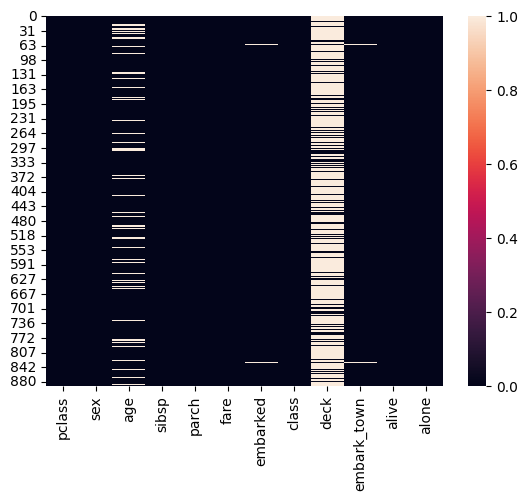

,0
pclass,0
sex,0
age,106
sibsp,0
parch,0
fare,0
embarked,2
class,0
deck,582
embark_town,2


In [7]:
sns.heatmap(data.isna())
plt.show()
data.isna().sum()

In [8]:
data.isna().sum()/data.shape[0]*100

,0
pclass,0.000000
sex,0.000000
age,13.520408
sibsp,0.000000
parch,0.000000
fare,0.000000
embarked,0.255102
class,0.000000
deck,74.234694
embark_town,0.255102


## Dropping Rows with Missing Values

In [9]:
data = data.dropna()
data

,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alive,alone
1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,yes,False
3,1,female,35.0,1,0,53.1000,S,First,C,Southampton,yes,False
6,1,male,54.0,0,0,51.8625,S,First,E,Southampton,no,True
10,3,female,4.0,1,1,16.7000,S,Third,G,Southampton,yes,False
11,1,female,58.0,0,0,26.5500,S,First,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,female,47.0,1,1,52.5542,S,First,D,Southampton,yes,False
872,1,male,33.0,0,0,5.0000,S,First,B,Southampton,no,True
879,1,female,56.0,0,1,83.1583,C,First,C,Cherbourg,yes,False
887,1,female,19.0,0,0,30.0000,S,First,B,Southampton,yes,True


## Splitting Numerical and Categorical Columns

In [10]:
num_df = data.select_dtypes(include = "number")
cat_df = data.select_dtypes(include = "object_")

In [11]:
print("Numerical columns are = ")
num_cols = num_df.columns.tolist()
print(num_cols)

cat_cols = cat_df.columns.tolist()
print("Categorical columns are = ")
print(cat_cols)

Numerical columns are = 
['pclass', 'age', 'sibsp', 'parch', 'fare']
Categorical columns are = 
['sex', 'embarked', 'embark_town', 'alive']


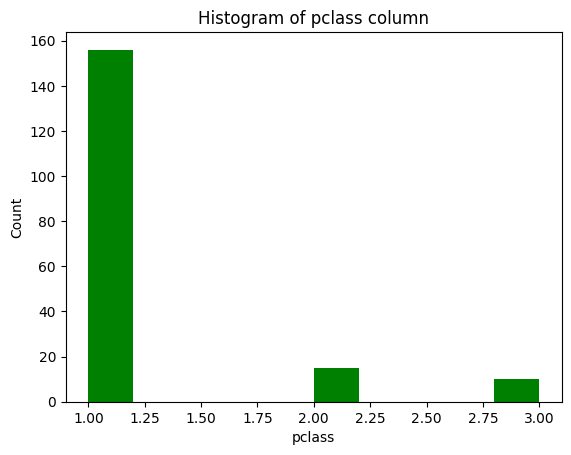

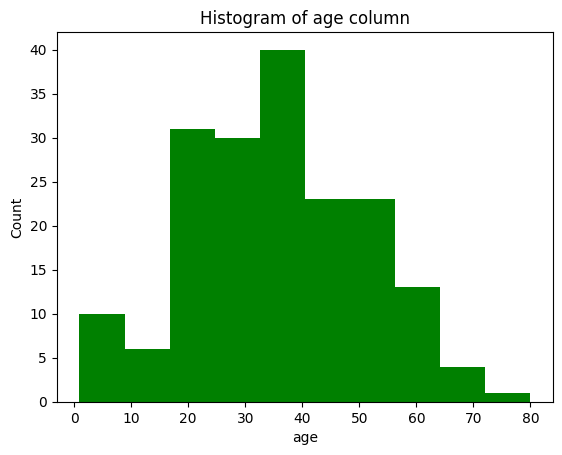

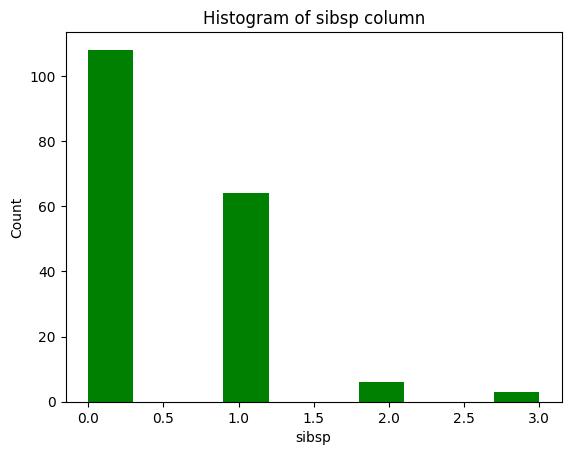

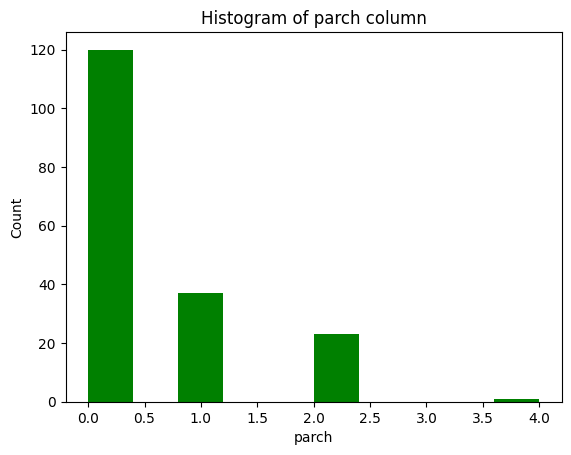

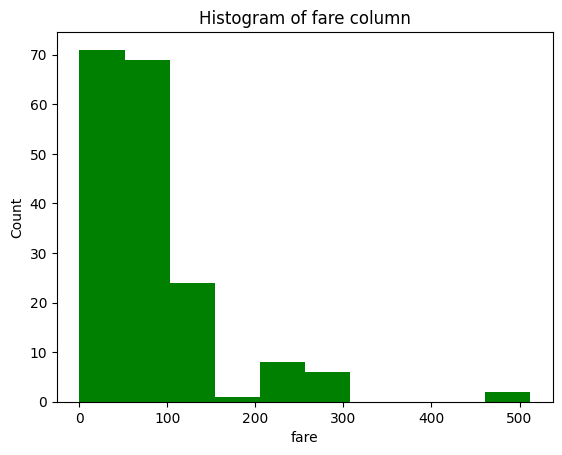

In [12]:
for col in num_cols:
    plt.hist(num_df[col], color = "green")
    plt.title("Histogram of {} column".format(col))
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

## Filling Missing Values for Numerical Columns

In [13]:
for col in num_cols:
    num_df[col] = num_df[col].fillna(num_df[col].median())

In [14]:
num_df.isna().sum()

,0
pclass,0
age,0
sibsp,0
parch,0
fare,0


## Filling Missing Values for Categorical Columns

In [15]:
for col in cat_cols:
    cat_df[col] = cat_df[col].fillna(cat_df[col].mode()[0])

In [16]:
cat_df.isna().sum()

,0
sex,0
embarked,0
embark_town,0
alive,0


## Recombine both Numerical and Categorical Columns

In [17]:
data = pd.concat([num_df, cat_df], axis = 1)

In [18]:
data.isna().sum()

,0
pclass,0
age,0
sibsp,0
parch,0
fare,0
sex,0
embarked,0
embark_town,0
alive,0


## Heatmap to Check for Duplicates

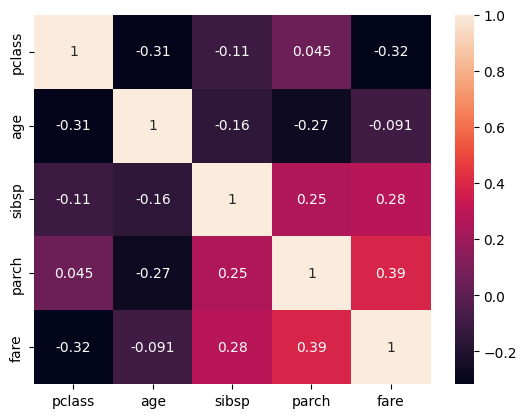

In [19]:
sns.heatmap(num_df.corr(), annot = True)
plt.show()

## Handling Outliers

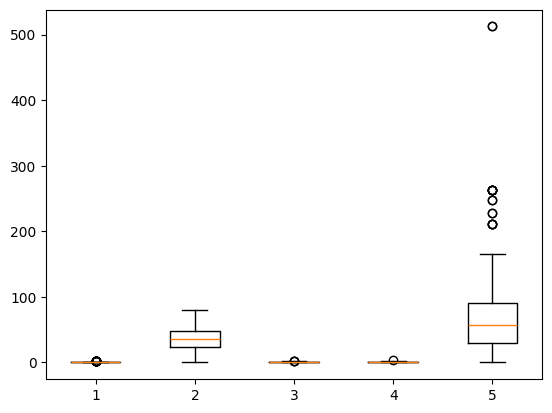

In [20]:
plt.boxplot(num_df)
plt.show()

## Remove Outliers

In [21]:
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df[column_name] = df[column_name].clip(upper = upper_bound)
    df[column_name] = df[column_name].clip(lower = lower_bound)
    return df[column_name]

In [22]:
for col in num_cols:
    num_df[col] = remove_outliers(num_df, col)

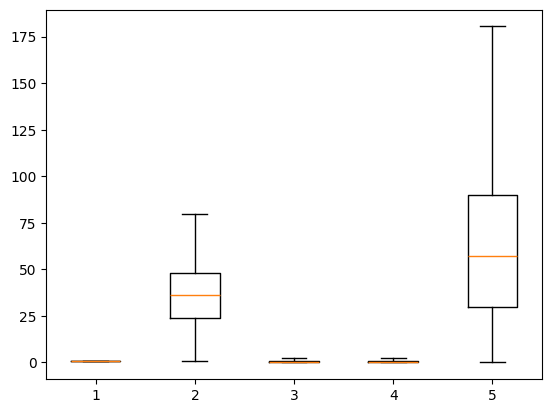

In [23]:
plt.boxplot(num_df)
plt.show()

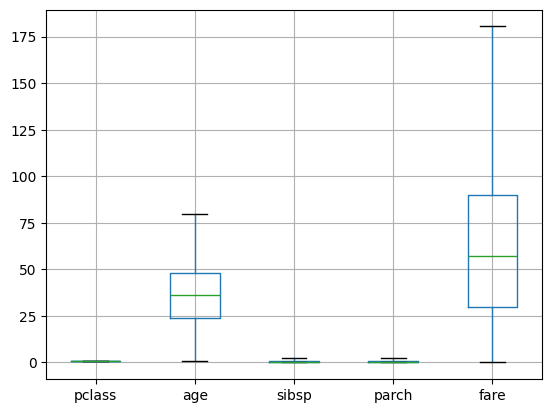

In [24]:
num_df.boxplot()
plt.show()

## Concatenating Numerical and Categorical Columns

In [25]:
data = pd.concat([num_df,cat_df], axis = 1)
data

,pclass,age,sibsp,parch,fare,sex,embarked,embark_town,alive
1,1,38.0,1.0,0.0,71.2833,female,C,Cherbourg,yes
3,1,35.0,1.0,0.0,53.1000,female,S,Southampton,yes
6,1,54.0,0.0,0.0,51.8625,male,S,Southampton,no
10,1,4.0,1.0,1.0,16.7000,female,S,Southampton,yes
11,1,58.0,0.0,0.0,26.5500,female,S,Southampton,yes
...,...,...,...,...,...,...,...,...,...
871,1,47.0,1.0,1.0,52.5542,female,S,Southampton,yes
872,1,33.0,0.0,0.0,5.0000,male,S,Southampton,no
879,1,56.0,0.0,1.0,83.1583,female,C,Cherbourg,yes
887,1,19.0,0.0,0.0,30.0000,female,S,Southampton,yes


## Checking for Data Imbalance

In [26]:
data["embark_town"].value_counts()

,count
embark_town,
Southampton,115
Cherbourg,64
Queenstown,2


## Plot Class Imbalance

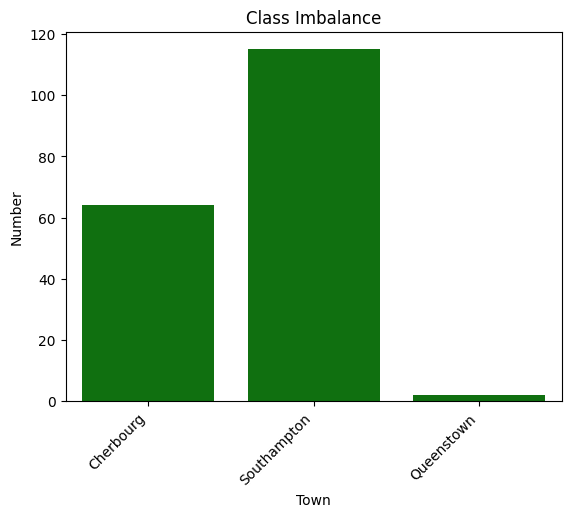

In [27]:
sns.countplot(x = "embark_town", data = data, color = "green")
plt.title("Class Imbalance")
plt.xlabel("Town")
plt.ylabel("Number")
plt.xticks(rotation = 45, ha = "right")
plt.show()

## Sampling

In [28]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

x = data.drop("embark_town", axis = 1)
y = data["embark_town"]

oversampler = RandomOverSampler(random_state = 42)
x_resampled, y_resampled = oversampler.fit_resample(x,y)

## New Balanced DataFrame

embark_town
Cherbourg      115
Southampton    115
Queenstown     115
Name: count, dtype: int64


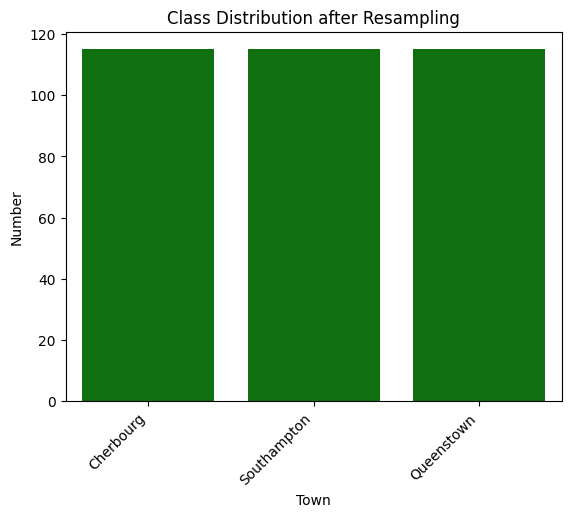

In [29]:
balanced_data = pd.DataFrame(x_resampled, columns = x.columns)
balanced_data["embark_town"] = y_resampled
print(balanced_data["embark_town"].value_counts())

sns.countplot(x = "embark_town", data = balanced_data, color = "green")
plt.title("Class Distribution after Resampling")
plt.xlabel("Town")
plt.ylabel("Number")
plt.xticks(rotation = 45, ha = "right")
plt.show()

## Training and Testing Split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [32]:
x_train

,pclass,age,sibsp,parch,fare,sex,embarked,alive
689,1,15.0,0.0,1.0,180.4500,female,S,yes
194,1,44.0,0.0,0.0,27.7208,female,C,yes
618,1,4.0,2.0,1.0,39.0000,female,S,yes
698,1,49.0,1.0,1.0,110.8833,male,C,no
823,1,27.0,0.0,1.0,12.4750,female,S,yes
...,...,...,...,...,...,...,...,...
712,1,48.0,1.0,0.0,52.0000,male,S,yes
193,1,3.0,1.0,1.0,26.0000,male,S,yes
572,1,36.0,0.0,0.0,26.3875,male,S,yes
745,1,70.0,1.0,1.0,71.0000,male,S,no


In [33]:
x_test

,pclass,age,sibsp,parch,fare,sex,embarked,alive
205,1,2.0,0.0,1.0,10.4625,female,S,no
717,1,27.0,0.0,0.0,10.5000,female,S,yes
536,1,45.0,0.0,0.0,26.5500,male,S,no
1,1,38.0,1.0,0.0,71.2833,female,C,yes
473,1,23.0,0.0,0.0,13.7917,female,C,yes
460,1,48.0,0.0,0.0,26.5500,male,S,yes
183,1,1.0,2.0,1.0,39.0000,male,S,yes
88,1,23.0,2.5,2.0,180.4500,female,S,yes
462,1,47.0,0.0,0.0,38.5000,male,S,no
170,1,61.0,0.0,0.0,33.5000,male,S,no


In [34]:
y_train

,embark_town
689,Southampton
194,Cherbourg
618,Southampton
698,Cherbourg
823,Southampton
...,...
712,Southampton
193,Southampton
572,Southampton
745,Southampton


In [35]:
y_test

,embark_town
205,Southampton
717,Southampton
536,Southampton
1,Cherbourg
473,Cherbourg
460,Southampton
183,Southampton
88,Southampton
462,Southampton
170,Southampton


## OneHot Function

In [ ]:
town_onehot = pd.get_dummies(data["embark_town"])
town_onehot

,Cherbourg,Queenstown,Southampton
1,True,False,False
3,False,False,True
6,False,False,True
10,False,False,True
11,False,False,True
...,...,...,...
871,False,False,True
872,False,False,True
879,True,False,False
887,False,False,True


## Label Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder,StandardScaler
label_enc = LabelEncoder()
data["town_encoded"] = label_enc.fit_transform(data["embark_town"])
data

,pclass,age,sibsp,parch,fare,sex,embarked,embark_town,alive,town_encoded
1,1,38.0,1.0,0.0,71.2833,female,C,Cherbourg,yes,0
3,1,35.0,1.0,0.0,53.1000,female,S,Southampton,yes,2
6,1,54.0,0.0,0.0,51.8625,male,S,Southampton,no,2
10,1,4.0,1.0,1.0,16.7000,female,S,Southampton,yes,2
11,1,58.0,0.0,0.0,26.5500,female,S,Southampton,yes,2
...,...,...,...,...,...,...,...,...,...,...
871,1,47.0,1.0,1.0,52.5542,female,S,Southampton,yes,2
872,1,33.0,0.0,0.0,5.0000,male,S,Southampton,no,2
879,1,56.0,0.0,1.0,83.1583,female,C,Cherbourg,yes,0
887,1,19.0,0.0,0.0,30.0000,female,S,Southampton,yes,2


## Feature Slicing:

In [43]:

num_cols = ["pclass", "age", "sibsp", "parch", "fare", "town_encoded"]
std_scaler = StandardScaler()
scaled_data = std_scaler.fit_transform(data[num_cols])
scaled_df = pd.DataFrame(scaled_data, columns=num_cols)
scaled_df

,pclass,age,sibsp,parch,fare,town_encoded
0,0.0,0.147792,0.877364,-0.652501,0.012908,-1.343985
1,0.0,-0.043930,0.877364,-0.652501,-0.347129,0.753095
2,0.0,1.170310,-0.751384,-0.652501,-0.371632,0.753095
3,0.0,-2.025058,0.877364,0.728817,-1.067865,0.753095
4,0.0,1.425939,-0.751384,-0.652501,-0.872830,0.753095
...,...,...,...,...,...,...
176,0.0,0.722958,0.877364,0.728817,-0.357936,0.753095
177,0.0,-0.171745,-0.751384,-0.652501,-1.299530,0.753095
178,0.0,1.298124,-0.751384,0.728817,0.248038,-1.343985
179,0.0,-1.066448,-0.751384,-0.652501,-0.804519,0.753095


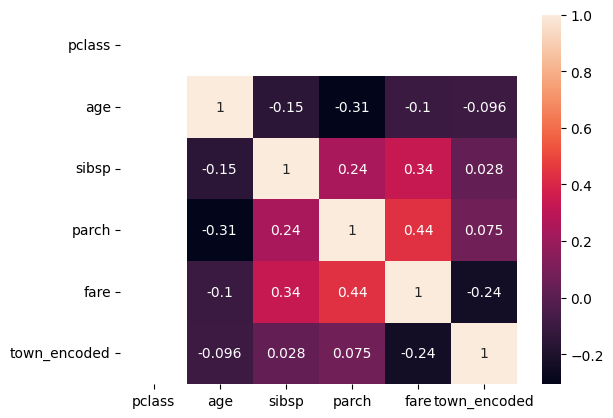

In [44]:
sns.heatmap(scaled_df.corr(), annot = True)
plt.show()

### 2. MinMaxSlicing

In [46]:
from sklearn.preprocessing import MinMaxScaler
num_cols = [ "pclass", "age", "sibsp", "parch", "fare", "town_encoded"]
minmax_scaler = MinMaxScaler()
minmax_data = minmax_scaler.fit_transform(data[num_cols])
minmax_df = pd.DataFrame(minmax_data, columns=num_cols)
minmax_df

,pclass,age,sibsp,parch,fare,town_encoded
0,0.0,0.468892,0.4,0.0,0.395031,0.0
1,0.0,0.430956,0.4,0.0,0.294264,1.0
2,0.0,0.671219,0.0,0.0,0.287406,1.0
3,0.0,0.038948,0.4,0.4,0.092546,1.0
4,0.0,0.721801,0.0,0.0,0.147132,1.0
...,...,...,...,...,...,...
176,0.0,0.582701,0.4,0.4,0.291240,1.0
177,0.0,0.405665,0.0,0.0,0.027709,1.0
178,0.0,0.696510,0.0,0.4,0.460838,0.0
179,0.0,0.228629,0.0,0.0,0.166251,1.0


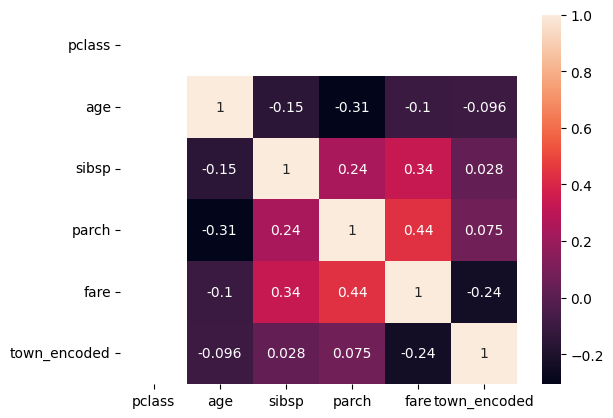

In [47]:
sns.heatmap(minmax_df.corr(), annot = True)
plt.show()